In [1446]:
import numpy as np
import matplotlib.pyplot as plt
from modules.Particle import Particle
from modules.Direct_Classes import Direct
from modules.FMM_Classes import FMM
from modules.Analytic_Classes import SingleParticle
%load_ext autoreload
%autoreload 2
from modules.testing import PointTesting
import copy
import modules.Utility as util


# Create particle distribution to be used in all simulations
#np.random.seed(100)
n_particles = 1000
max_property = 0 # property could be mass or charge 
box_size = 1000

# Generate initial particles
#initial_positions = np.random.beta(2,2,(n_particles,2)) * box_size
initial_positions=[]
line_n = int(np.sqrt(n_particles))
start_inset = box_size/(line_n+1)
for x in np.linspace(start_inset, box_size - start_inset, line_n, True):
    for y in np.linspace(start_inset, box_size - start_inset, line_n, True):
        initial_positions.append(np.array([x, y])) 
initial_positions = np.array(initial_positions)
print(initial_positions)
#initial_positions = np.random.uniform(0,1,(n_particles,2)) * box_size

initial_particles = []
for initial_position in initial_positions:
    initial_particles.append(Particle(initial_position, np.random.uniform(0,max_property)))
point = 600
charge = 1
initial_particles.append(Particle(np.array([point,point]), charge))



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[[ 312.5  312.5]
 [ 312.5  625. ]
 [ 312.5  937.5]
 ...
 [9687.5 9062.5]
 [9687.5 9375. ]
 [9687.5 9687.5]]


## Analytic Potential Graph

Locator attempting to generate 1002 ticks ([-6.745, ..., -1.7400000000000002]), which exceeds Locator.MAXTICKS (1000).


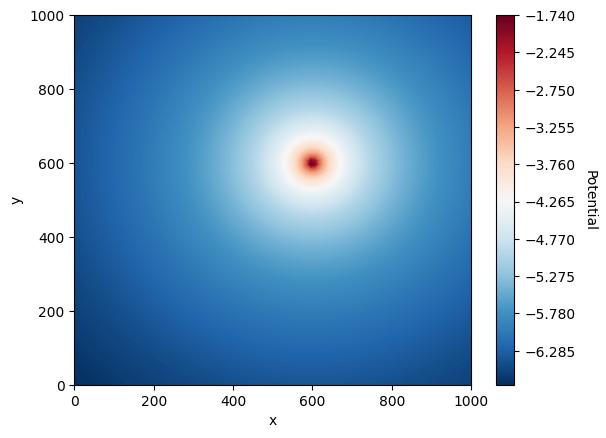

In [1447]:
analytic_simulation = SingleParticle([point, point], charge, box_size)
analytic_simulation.plot_potential()
analytic_particles = copy.deepcopy(initial_particles)
analytic_simulation.evaluate_particle_potentials(analytic_particles)

## FMM Potential Graph

In [1448]:
# FMM Simulation
expansion_order = 100
n_levels = 2
fmm_particles = copy.deepcopy(initial_particles)
fmm_simulation = FMM(box_size, expansion_order, fmm_particles, n_levels)
fmm_simulation.run()

IndexError: list index out of range

Mean:  -5.817253204813909
Median:  -5.959455635412562
Min:  -6.609971852871596
Max:  0.0


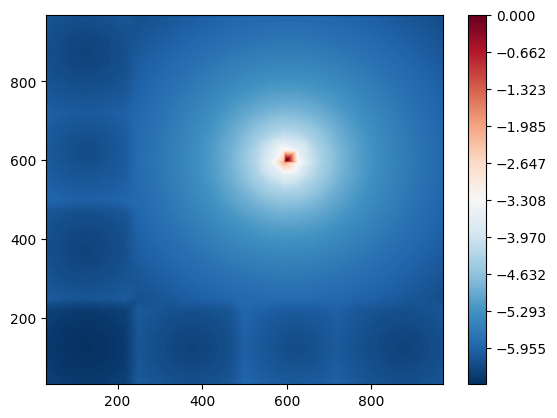

In [ ]:
util.plot_potentials(fmm_particles, [None,0])

## Multipole Expansion About a Specified Meshbox
This is then also compared to the analytic result

[1.0, -35.35533905932738, -625.0, -14731.391274719741, -390625.00000000006, -11048543.456039807, -325520833.33333343, -9864770942.892685, -305175781250.00006, -9590749527812.334, -305175781250000.1, -9808721107989888.0, -3.1789143880208346e+17, -1.0374608864220074e+19, -3.405979701450895e+20, -1.1239159602905082e+22, -3.725290298461916e+23, -1.239613191496884e+25, -4.139211442735463e+26, -1.3864094904899363e+28, -4.656612873077396e+29, -1.5679631142445708e+31, -5.291605537587951e+32, -1.7895231195182605e+34, -6.0632980118195265e+35, -2.0579515874459993e+37, -6.996113090560993e+38, -2.381888411395833e+40, -8.120488408686867e+41, -2.7720253063658403e+43, -9.473903143468012e+44, -3.2414812050245715e+46, -1.1102230246251579e+48, -3.8062847483243077e+49, -1.306144734853127e+51, -4.485978453382221e+52, -1.541976423090497e+54, -5.30436641447222e+55, -1.826024711554536e+57, -6.290434529983083e+58, -2.168404344971012e+60, -7.479480081382324e+61, -2.58143374401311e+63, -8.914496608624282e+64, -3

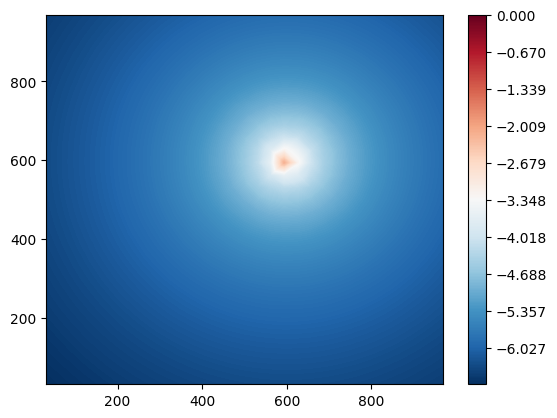

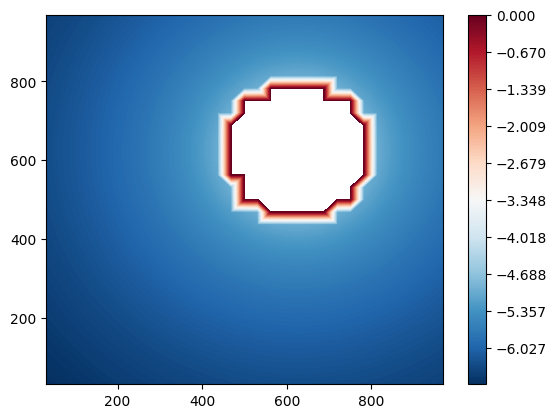

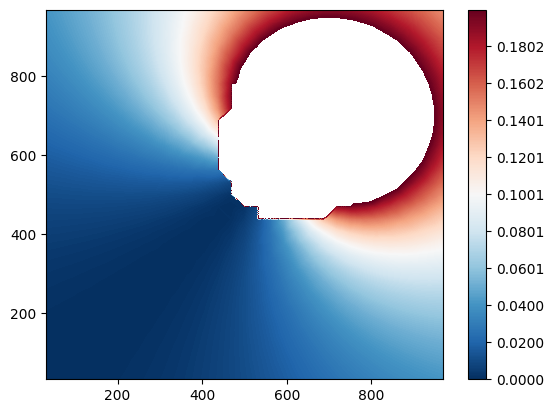

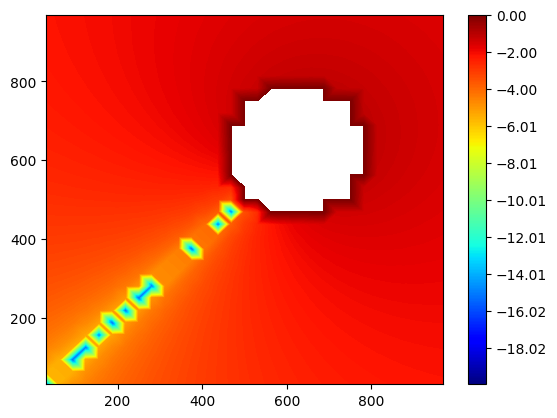

In [ ]:
# test_positions=[]
test_factor = 10
# line_n = int(np.sqrt(n_particles))
# start_inset = (box_size/(line_n+1))*test_factor
# for x in np.linspace(start_inset, box_size*test_factor - start_inset, line_n, True):
#     for y in np.linspace(start_inset, box_size*test_factor - start_inset, line_n, True):
#         initial_positions.append(np.array([x, y])) 
test_positions = np.array(initial_positions) * test_factor
print(initial_positions)
#initial_positions = np.random.uniform(0,1,(n_particles,2)) * box_size

test_particles = []
for test_position in test_positions:
    test_particles.append(Particle(test_position, 0))

test_meshbox = fmm_simulation.mesh.meshboxes[2][2][2]
print(test_meshbox.mpe_coefficients)
r = test_meshbox.width * np.sqrt(2)/2 #(box_size / int(np.sqrt(n_particles))) * (2**(test_meshbox.mesh.n_levels-test_meshbox.level))*np.sqrt(2)
print(r)
#test_particles = copy.deepcopy(initial_particles)
point_test = PointTesting(test_particles, test_meshbox, r)
point_test.test_mpe()
util.plot_potentials(analytic_particles, [None,0])
util.plot_potentials(test_particles, [None, 0])
util.plot_difference(test_particles, analytic_particles, [None, 0.2])
util.plot_log_relative_errors(point_test.particles, analytic_particles, [-20,0])

Mean:  -0.024500305110656068
Median:  0.0
Min:  -0.42151266812877974
Max:  0.15039879053031502
Mean:  -6.40332552161342
Median:  -2.0321496639687107
Min:  -15.913397298801067
Max:  -1.1792387200007743
Mean:  -5.817253204813909
Median:  -5.959455635412562
Min:  -6.609971852871596
Max:  0.0
Mean:  -5.847806843124163
Median:  -5.954222725272498
Min:  -6.690014560545133
Max:  -2.179155054028283


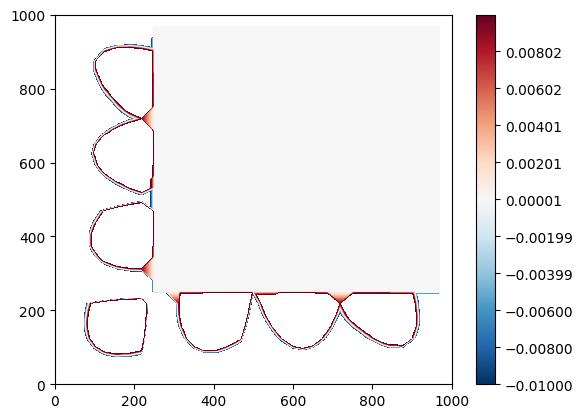

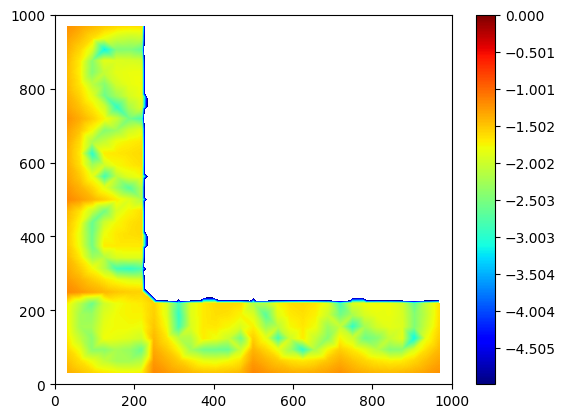

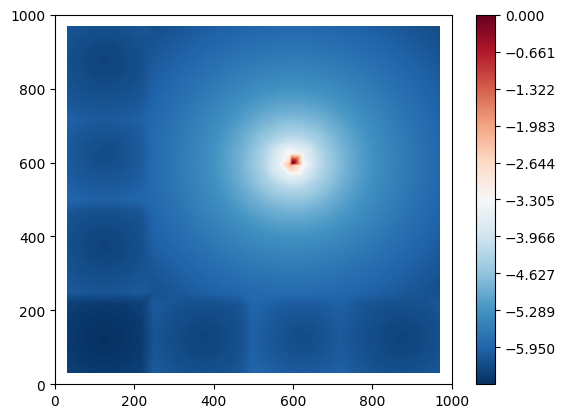

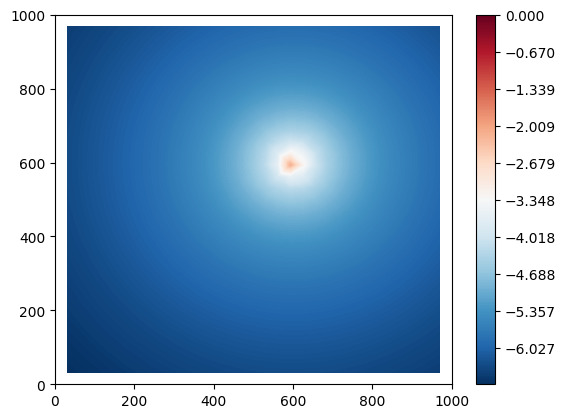

In [ ]:
util.plot_difference(analytic_particles, fmm_particles, [-0.01,0.01], x_range=[0,box_size], y_range=[0,box_size])
util.plot_log_relative_errors(fmm_particles, analytic_particles, [-5,0], x_range=[0,box_size], y_range=[0,box_size])
util.plot_potentials(fmm_particles, [None,0], x_range=[0,box_size], y_range=[0,box_size], z_levels=10000)
util.plot_potentials(analytic_particles, [None,0], x_range=[0,box_size], y_range=[0,box_size])
#fmm_simulation.plot_potential()
#analytic_simulation.plot_potential()

In [ ]:
print(fmm_simulation.mesh.meshboxes[0][0][0].mpe_coefficients)

[ 1.00000000e+000 -5.65685425e+002 -1.60000000e+005 -6.03397787e+007
 -2.56000000e+010 -1.15852375e+013 -5.46133333e+015 -2.64805429e+018
 -1.31072000e+021 -6.59071289e+023 -3.35544320e+026 -1.72556847e+029
 -8.94784853e+031 -4.67230846e+034 -2.45426703e+037 -1.29578688e+040
 -6.87194767e+042 -3.65869237e+045 -1.95468734e+048 -1.04754139e+051
 -5.62949953e+053 -3.03288175e+056 -1.63767259e+059 -8.86128928e+061
 -4.80383960e+064 -2.60876357e+067 -1.41898031e+070 -7.72966982e+072
 -4.21639865e+075 -2.30290853e+078 -1.25929773e+081 -6.89386810e+083
 -3.77789319e+086 -2.07233853e+089 -1.13781254e+092 -6.25254140e+094
 -3.43872233e+097 -1.89266118e+100 -1.04247582e+103 -5.74592523e+105
 -3.16912650e+108 -1.74900358e+111 -9.65829029e+113 -5.33649465e+116
 -2.95016867e+119 -1.63178147e+122 -9.03008149e+124 -4.99950069e+127
 -2.76922499e+130 -1.53454062e+133 -8.50705917e+135 -4.71796018e+138
 -2.61755667e+141 -1.45277566e+144 -8.06595240e+146 -4.47983186e+149
 -2.48892246e+152 -1.38324633e+155